In [44]:
import pandas as pd
import pathlib
import os, os.path

In [45]:
dir_cur = pathlib.Path(os.getcwd())
input_data = dir_cur.joinpath("input_data")
output_data = dir_cur.joinpath("output_data")

# Census Households counts (2014) by Region, District and Mid-Year Projected Households (2015-2021) 

In [46]:
# Load the house data
house = pd.read_csv(input_data.joinpath("households.csv")) 
house.head(20)

,year,households
0,2015,7476700
1,2016,7747300
2,2017,8032200
3,2018,8333900
4,2019,8647400
5,2020,8975900
6,2021,9813500


In [47]:
pop = pd.read_csv(output_data.joinpath("POPULATION.csv")) 
pop.head(10)

,year,population_gnrl_rural,population_gnrl_urban
0,1950,5259623,155176
1,1951,5398130,167554
2,1952,5541329,180536
3,1953,5690012,194173
4,1954,5844177,208492
5,1955,6003709,223516
6,1956,6166191,241520
7,1957,6334115,260424
8,1958,6508091,280289
9,1959,6688393,301168


In [48]:
# Merge the population and household data on 'year'
df = pd.merge(pop, house, on='year', how='left')
df.head()

,year,population_gnrl_rural,population_gnrl_urban,households
0,1950,5259623,155176,NaN
1,1951,5398130,167554,NaN
2,1952,5541329,180536,NaN
3,1953,5690012,194173,NaN
4,1954,5844177,208492,NaN


In [49]:
# Calculate the population growth rate
df['population'] = df['population_gnrl_rural'] + df['population_gnrl_urban']
df['pop_growth'] = df['population'] / df['population'].shift(1)

In [50]:
# Find the indices for the first and last years with observed household data
first_obs_idx = df[df['households'].notnull()].index[0]
last_obs_idx = df[df['households'].notnull()].index[-1]

In [51]:
# Forward extrapolation (for years after the last observed household data)
for idx in range(last_obs_idx + 1, len(df)):
    prev_idx = idx - 1
    df.at[idx, 'households'] = df.at[prev_idx, 'households'] * df.at[idx, 'pop_growth']

In [52]:
# Backward extrapolation (for years before the first observed household data)
for idx in range(first_obs_idx - 1, -1, -1):
    next_idx = idx + 1
    df.at[idx, 'households'] = df.at[next_idx, 'households'] / df.at[next_idx, 'pop_growth']


In [53]:
# Round to integer values and set as integer type
df['households'] = df['households'].round().astype('Int64')

<Axes: xlabel='year'>

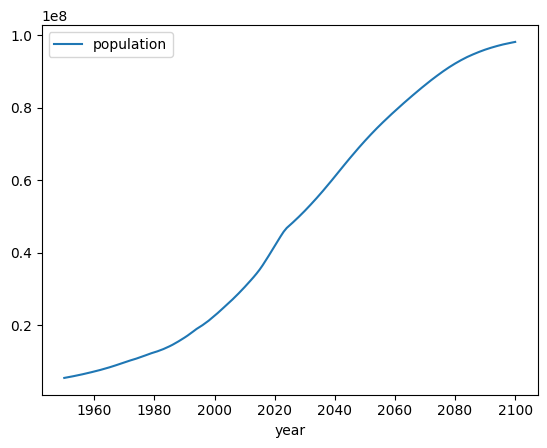

In [58]:
df.plot(x = 'year', y='population')

<Axes: xlabel='year'>

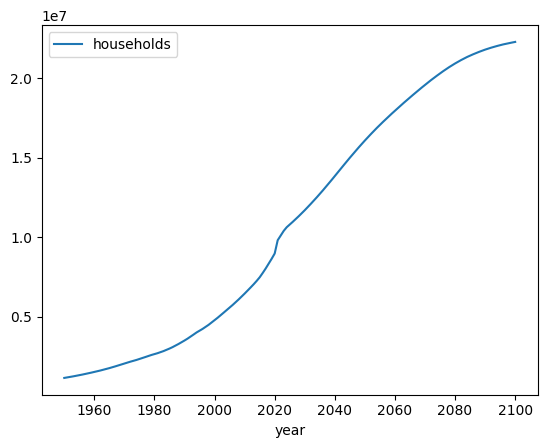

In [71]:
df.plot(x = 'year', y='households')

<Axes: xlabel='year'>

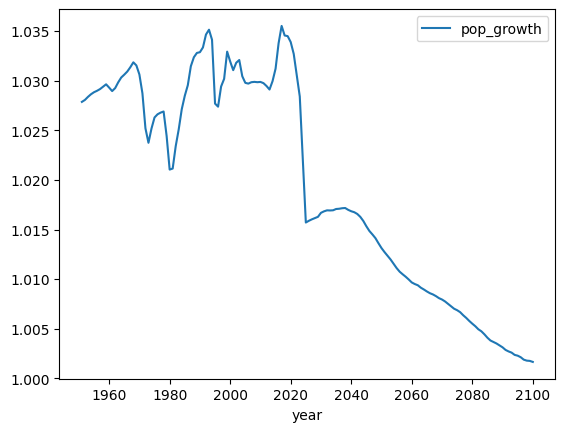

In [60]:
df.plot(x = 'year', y='pop_growth')

In [ ]:
df['occrateinit_gnrl_occupancy'] = df['population'] / df['households']
df.describe()

,year,population_gnrl_rural,population_gnrl_urban,households,population,pop_growth,occrateinit_gnrl_occupancy
count,151.000000,1.510000e+02,1.510000e+02,151.0,1.510000e+02,150.000000,151.0
mean,2025.000000,2.332505e+07,2.535029e+07,10925518.039735,4.867534e+07,1.019564,4.554984
std,43.734045,1.137344e+07,2.769305e+07,7544918.990048,3.279821e+07,0.010838,0.159968
min,1950.000000,5.259623e+06,1.551760e+05,1145649.0,5.414799e+06,1.001653,4.404917
25%,1987.500000,1.237665e+07,1.569422e+06,3229683.5,1.526479e+07,1.009197,4.404917
50%,2025.000000,2.355167e+07,1.353908e+07,10797247.0,4.756098e+07,1.017156,4.404917
75%,2062.500000,3.470930e+07,4.492061e+07,18385827.5,8.098805e+07,1.029742,4.726405
max,2100.000000,3.907048e+07,8.948691e+07,22293482.0,9.820094e+07,1.035522,4.726407


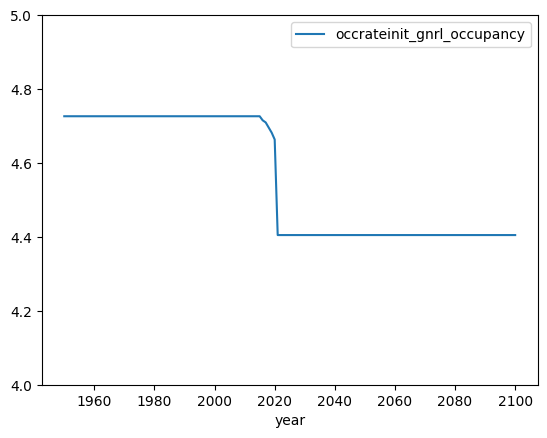

In [70]:
import matplotlib.pyplot as plt

ax = df.plot(x='year', y='occrateinit_gnrl_occupancy')
plt.ylim(4, 5)  # Ajusta los valores mínimo y máximo del eje y
plt.show()

In [72]:
# Prepare the final DataFrame with the required columns
df = df[['year', 'occrateinit_gnrl_occupancy']]

In [73]:
df.to_csv(output_data.joinpath("occrateinit_gnrl_occupancy.csv"), index=False)